In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

from sklearn.preprocessing import MinMaxScaler
from datetime import datetime

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

plt.rcParams['figure.figsize']=[12,8]

matplotlib.rc('font',family='NanumGothic')
df_order=pd.read_csv("./log_order_sheet_001.csv")
df_do=pd.read_excel("./탕용기.xlsx",encoding="UTF-8")


/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  
/home/piai/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df_order

,Unnamed: 0,결제수단,공급원가,교환구분,네이버 포인트,배송번호,배송비 정보,배송시작일,배송완료일,사용한 적립금액,상품구매금액,상품명,상품번호,상품별 추가할인금액,수령인 주소,주문경로,주문번호,주문일시,주문자ID,카드사,쿠폰 할인금액,판매가,품목번호,친환경,사은품,회원,주문수량,총수량
0,0,무통장입금,44550.0,교환안함,0,D-20181227-0000648-00,무료,2019-01-07 오전 8:56,2019-01-11 오전 5:32,0,71450,195파이 탕용기 소 300개 1set(2박스),1077,13600,경상남도 거제시 능포로 168-1 (능포동),PC쇼핑몰,20181227-0000648,2018-12-27 오후 2:54,pp683,기타,0,71450,42602,False,False,True,1,300
1,1,무통장입금,44000.0,교환안함,0,D-20181229-0000119-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,141240,"95파이 다용도컵 세트 4호 소 200ml 백색 PS 1,000개 1set(2박스)",42,19800,서울특별시 동대문구 한천로36길 16 (장안동),모바일웹,20181229-0000119,2018-12-29 오후 1:22,asd0908,기타,0,70620,42930,False,False,True,2,2000
2,2,무통장입금,6820.0,교환안함,0,D-20181230-0000100-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,13910,비닐봉투 배달중 중 백색 200개,1271,2900,세종특별자치시 호려울로 29 (보람동),모바일웹,20181230-0000100,2018-12-30 오후 3:15,NaN,기타,0,13910,42998,False,False,False,1,200
3,3,무통장입금,49500.0,교환안함,0,D-20181231-0000087-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,81600,195파이 미니탕용기 투톤 300개 1set(2박스),1085,12630,부산광역시 부산진구 가야대로 482 (개금동),모바일웹,20181231-0000087,2018-12-31 오전 10:30,23533593@n,기타,0,81600,43063,False,False,True,1,300
4,4,무통장입금,61600.0,교환안함,0,D-20181231-0000108-00,무료,2019-01-07 오전 8:56,2019-01-11 오전 5:32,0,94710,250파이 원형 접시 미니 블랙 400개 1박스,1106,18000,부산광역시 해운대구 선수촌로 104-21 (반여동),모바일웹,20181231-0000108,2018-12-31 오전 10:43,romandoll,기타,0,94710,43066,False,False,True,1,400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46744,46744,카드,36300.0,교환안함,0,D-20171229-0000036-00,무료,2017-12-29 오후 4:32,2018-01-02 오전 5:31,0,52800,PP 4칸 도시락용기 A 200개 1박스,445.0,6340,서울특별시 서초구 강남대로97길 23 (잠원동),모바일웹,20171229-0000036,2017-12-29 오후 1:39,73987748@n,국민,0,52800,3170,False,False,True,1,200
46745,46745,카드,36300.0,교환안함,0,D-20171229-0000043-00,무료,2018-01-03 오전 9:45,2018-01-07 오전 5:38,0,112200,PP 6칸 도시락용기 02 200개 1박스,172.0,13460,경기도 의정부시 용민로 483 (민락동),모바일웹,20171229-0000043,2017-12-29 오후 5:16,chuheesuk,비씨,0,56100,3172,False,False,True,2,400
46746,46746,카드,22280.0,교환안함,300,D-20171230-0000022-01,무료,2018-01-02 오후 7:06,2018-01-11 오전 2:46,0,36000,"170mm 수저 투명 1,500개 1박스",140.0,3600,대전광역시 서구 관저2동,네이버 페이,20171230-0000022,2017-12-30 오후 6:56,NaN,기타,0,36000,3177,False,False,False,1,1500
46747,46747,카드,55000.0,교환안함,320,D-20171231-0000017-01,무료,2018-01-03 오후 2:00,2018-01-06 오후 6:06,0,73460,170파이 원형 샐러드 3칸 150ml x 3 검정 400개 1set(2박스),184.0,5140,광주광역시 서구 화운로 152 (화정동,네이버 페이,20171231-0000017,2017-12-31 오전 10:00,NaN,기타,0,73460,3178,False,False,False,1,400


In [3]:
type(df_order['주문일시'][0])

str

In [4]:
df_order['주문일시(월별)']=df_order['주문일시'].str.slice(start=0,stop=7)
df_split=df_order[['총수량','주문일시(월별)']]

In [5]:
df_split['주문일시(월별)']=pd.to_datetime(df_split['주문일시(월별)'])

/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [6]:
df_day=df_split.set_index("주문일시(월별)")

In [7]:
df_day=df_split.groupby(by=['주문일시(월별)']).sum().groupby(level=[0]).cumsum()

df_day

,총수량
주문일시(월별),
2017-01-01,2200
2017-02-01,17801
2017-03-01,32373
2017-04-01,41821
2017-05-01,77144
2017-06-01,112210
2017-07-01,182019
2017-08-01,149404
2017-09-01,204652


In [16]:
df_day_train=df_day[df_day.index<"2019-01-01"]
df_day_test=df_day[df_day.index>="2019-01-01"]
df_day_train

,총수량
주문일시(월별),
2017-01-01,2200
2017-02-01,17801
2017-03-01,32373
2017-04-01,41821
2017-05-01,77144
2017-06-01,112210
2017-07-01,182019
2017-08-01,149404
2017-09-01,204652


/home/piai/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


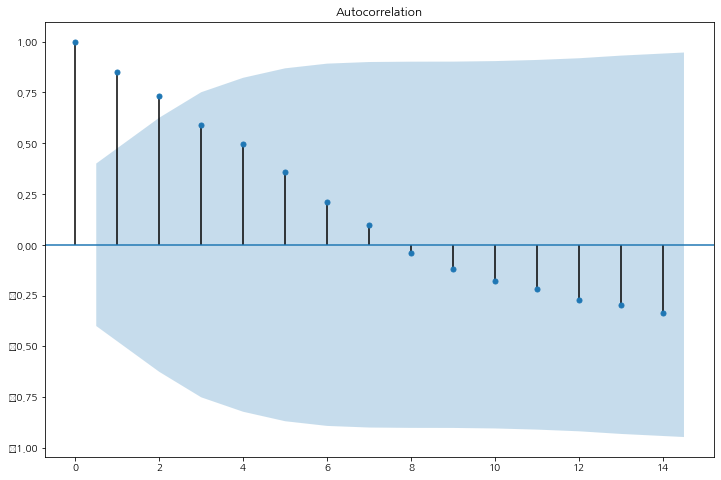

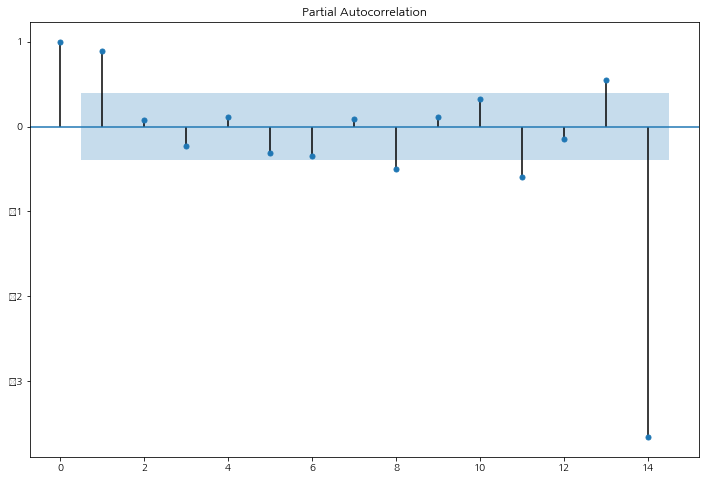

In [11]:
plot_acf(df_day_train)
plot_pacf(df_day_train)
plt.show()

In [12]:
#Train 데이터 이용, AR(1),I(2,차분),MA(0)인 ARIMA 모델
model=ARIMA(df_day_train,order=(1,2,0))
#데이터 적합
#trend:상수 포함 여부"nc"이면 상수 미포함,full_output:모든 출력결과 표시
result=model.fit(trend="nc",full_output=True)
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D2.총수량   No. Observations:                   22
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -304.780
Method:                       css-mle   S.D. of innovations         248285.537
Date:                Tue, 21 Jul 2020   AIC                            613.561
Time:                        21:33:40   BIC                            615.743
Sample:                    03-01-2017   HQIC                           614.075
                         - 12-01-2018                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
ar.L1.D2.총수량    -0.6480      0.151     -4.278      0.000      -0.945      -0.351
                                    Roots                                    
                  Real          Imaginary      

/home/piai/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/piai/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


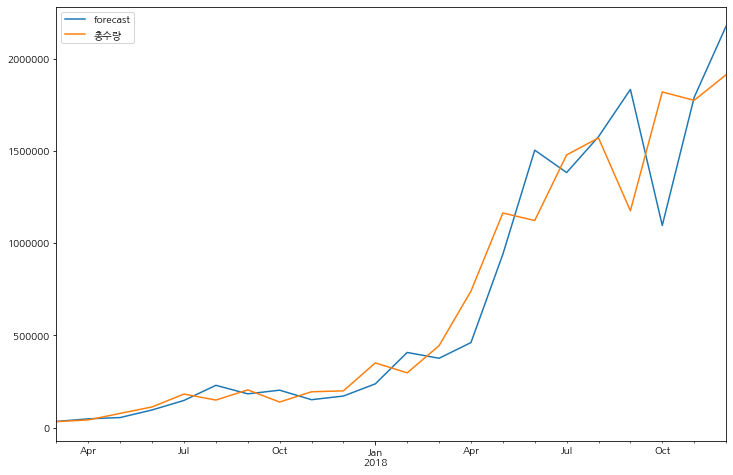

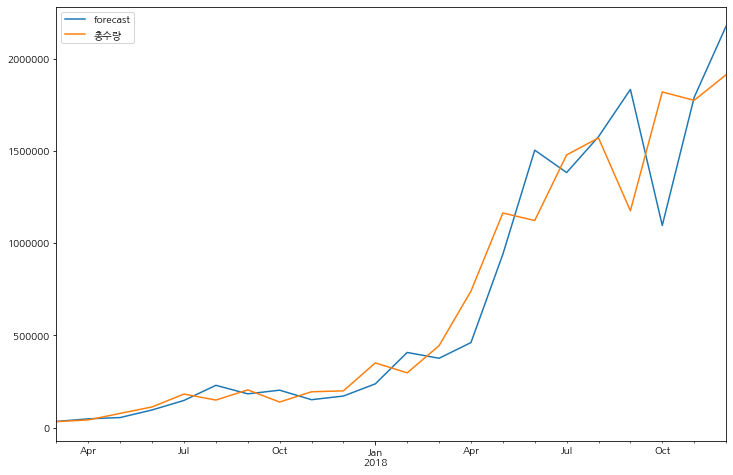

In [13]:
result.plot_predict()

In [14]:
start_time=df_day_test.index.min()
end_time=df_day_test.index.max()
print(start_time,end_time)
fig=result.predict(start=start_time,end=end_time,typ='levels')
fig

2019-01-01 00:00:00 2019-06-01 00:00:00


2019-01-01    1.933422e+06
2019-02-01    2.029952e+06
2019-03-01    2.076447e+06
2019-04-01    2.155366e+06
2019-05-01    2.213273e+06
2019-06-01    2.284796e+06
Freq: MS, dtype: float64

In [15]:
#전체 기간의 실제값, 예측값 확인
start_time=pd.to_datetime("2018-01") #차분=2->시작일자+2이후부터 예측값 생성됨
y_pred=result.predict(start=start_time,end=end_time,typ='levels')
df_merge=df_day_test # 실제값 저장
df_merge["예측값"]=y_pred.astype(int)#예측값 저장 및 변수명 지정
df_merge["차이(절댓값)"]=abs((df_merge["총수량"]-df_merge["예측값"])/df_merge["총수량"]*100)

df_merge.head()
#추세그래프 생성 및 확인


/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/piai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,총수량,예측값,차이(절댓값)
주문일시(월별),,,
2019-01-01,2338657,1933422,17.327680
2019-02-01,1875843,2029952,8.215453
2019-03-01,2395783,2076447,13.329087
2019-04-01,2686312,2155365,19.764904
2019-05-01,2351545,2213273,5.880049
